In [333]:
import pandas as pd
# Cases by Country
url ='https://github.com/CSSEGISandData/COVID-19/raw/web-data/data/cases_country.csv'
COVID = pd.read_csv(url)
print('Data Current as of: ',COVID.Last_Update.max(),'GMT')
COVID_cnts =COVID[['Country_Region', 'Confirmed','Active','Deaths', 'Recovered']]
hot_countries = COVID_cnts[COVID_cnts['Confirmed']>10000]
hot_countries.sort_values('Confirmed', ascending=False)

Data Current as of:  2020-03-29 16:21:34 GMT


,Country_Region,Confirmed,Active,Deaths,Recovered
17,US,125433,0,2201,2612
10,Italy,97689,73880,10779,13030
3,China,82122,3236,3304,75582
154,Spain,78799,57484,6606,14709
7,Germany,58247,49311,455,8481
87,Iran,38309,23278,2640,12391
6,France,38105,30064,2317,5724
16,United Kingdom,19763,18381,1231,151
15,Switzerland,14829,12934,300,1595
11,Netherlands,10926,9901,772,253


In [334]:
# Cases by State
url='https://github.com/CSSEGISandData/COVID-19/raw/web-data/data/cases_state.csv'
states_raw = pd.read_csv(url)
us_states = states_raw[states_raw['Country_Region']=='US']
states = us_states.groupby('Province_State')[['Deaths','Confirmed']].sum()
state2 = states.sort_values('Confirmed', ascending=False)
state10 = state2[:25].sort_values('Confirmed')
state2

,Deaths,Confirmed
Province_State,,
New York,834,53520
New Jersey,140,11124
California,121,5683
Michigan,112,4659
Washington,189,4319
Massachusetts,44,4257
Florida,54,4038
Illinois,47,3498
Louisiana,137,3315


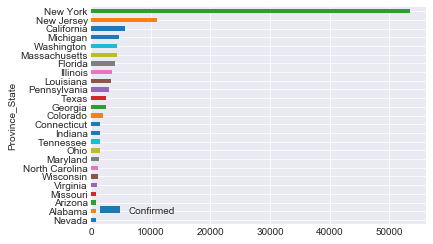

In [335]:
ax = state10.plot.barh(y='Confirmed')

In [336]:
# Case fatality ratio based on Outcomes in China
x = COVID_cnts[COVID_cnts['Country_Region']=='China'][['Deaths','Recovered']]
deaths = x['Deaths']
recovered = x['Recovered']
CFR = ((deaths / (deaths+recovered))).values[0]
print('Case fatality ratio {0:.3f}%'.format(CFR*100))

Case fatality ratio 4.188%


In [337]:
#Projected US Deaths
US_Pop = 329444452 # https://www.census.gov/popclock/
Flu_Avg_Annual_Infection = .125 # Avg is between 5-20%
Projected_US_Cases = US_Pop * Flu_Avg_Annual_Infection * 2 # assuming twice as contagious
Worst_Case_Infection = .40 * US_Pop # High year for flu is 20%
print('Projected U.S. Cases: {0:,.0f}'.format(Projected_US_Cases))
print('    Projected Deaths: {0:,.0f}'.format(Projected_US_Cases * CFR))
print('\nWorst Case Infection Count: {0:,.0f} , Deaths: {1:,.0f}'.format(Worst_Case_Infection, Worst_Case_Infection*CFR))


Projected U.S. Cases: 82,361,113
    Projected Deaths: 3,449,549

Worst Case Infection Count: 131,777,781 , Deaths: 5,519,278
